#Import Library and Load Dataset


In [ ]:
#Import library

#Data processing
import pandas as pd
import numpy as np

#Visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Split train, test
from sklearn.model_selection import train_test_split

#Feature scaling
from sklearn.preprocessing import StandardScaler

#Create model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#Evaluation metrics
from sklearn import metrics

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.dpi'] = 200

In [ ]:
#Load dataset
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


#Data Preprocessing

In [ ]:
#Map the True/False values to 0 and 1
df['Weekend'] = df['Weekend'].map({False: 0, True: 1})
df['Revenue'] = df['Revenue'].map({False: 0, True: 1})

In [ ]:
#One-hot encoding categorical data
df = pd.get_dummies(df)
df.head(10)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,1,1,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.0,0.0,2,2,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.0,4,1,9,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.0,0.0,3,2,2,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.0,0.0,3,3,1,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,0,0.0,0,0.0,19,154.216667,0.015789,0.024561,0.0,0.0,2,2,1,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.0,0.4,2,4,3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
7,1,0.0,0,0.0,0,0.000000,0.200000,0.200000,0.0,0.0,1,2,1,5,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
8,0,0.0,0,0.0,2,37.000000,0.000000,0.100000,0.0,0.8,2,2,2,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
9,0,0.0,0,0.0,3,738.000000,0.000000,0.022222,0.0,0.4,2,4,1,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [ ]:
#Remove the target column revenue from dataframe
X = df.drop(['Revenue'], axis = 1)
y = df['Revenue']

#Check the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 28)
Shape of y: (12330,)


In [ ]:
#Split train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (8631, 28)
Shape of y_train : (8631,)
Shape of X_test : (3699, 28)
Shape of y_test : (3699,)


In [ ]:
#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Build Machine Learning Model

##Decision Tree

In [ ]:
#Create model
model_DT = DecisionTreeClassifier(max_depth=3).fit(X_train,y_train)

[Text(775.0, 1057.0, 'X[8] <= 0.036\ngini = 0.254\nsamples = 8631\nvalue = [7345, 1286]\nclass = 0'),
 Text(387.5, 755.0, 'X[8] <= -0.315\ngini = 0.1\nsamples = 7184\nvalue = [6806, 378]\nclass = 0'),
 Text(193.75, 453.0, 'X[22] <= 0.608\ngini = 0.07\nsamples = 6756\nvalue = [6512, 244]\nclass = 0'),
 Text(96.875, 151.0, 'gini = 0.033\nsamples = 5212\nvalue = [5124, 88]\nclass = 0'),
 Text(290.625, 151.0, 'gini = 0.182\nsamples = 1544\nvalue = [1388, 156]\nclass = 0'),
 Text(581.25, 453.0, 'X[22] <= 0.608\ngini = 0.43\nsamples = 428\nvalue = [294, 134]\nclass = 0'),
 Text(484.375, 151.0, 'gini = 0.366\nsamples = 311\nvalue = [236, 75]\nclass = 0'),
 Text(678.125, 151.0, 'gini = 0.5\nsamples = 117\nvalue = [58, 59]\nclass = 1'),
 Text(1162.5, 755.0, 'X[6] <= -0.451\ngini = 0.467\nsamples = 1447\nvalue = [539, 908]\nclass = 1'),
 Text(968.75, 453.0, 'X[0] <= 0.659\ngini = 0.346\nsamples = 741\nvalue = [165, 576]\nclass = 1'),
 Text(871.875, 151.0, 'gini = 0.251\nsamples = 524\nvalue = [7

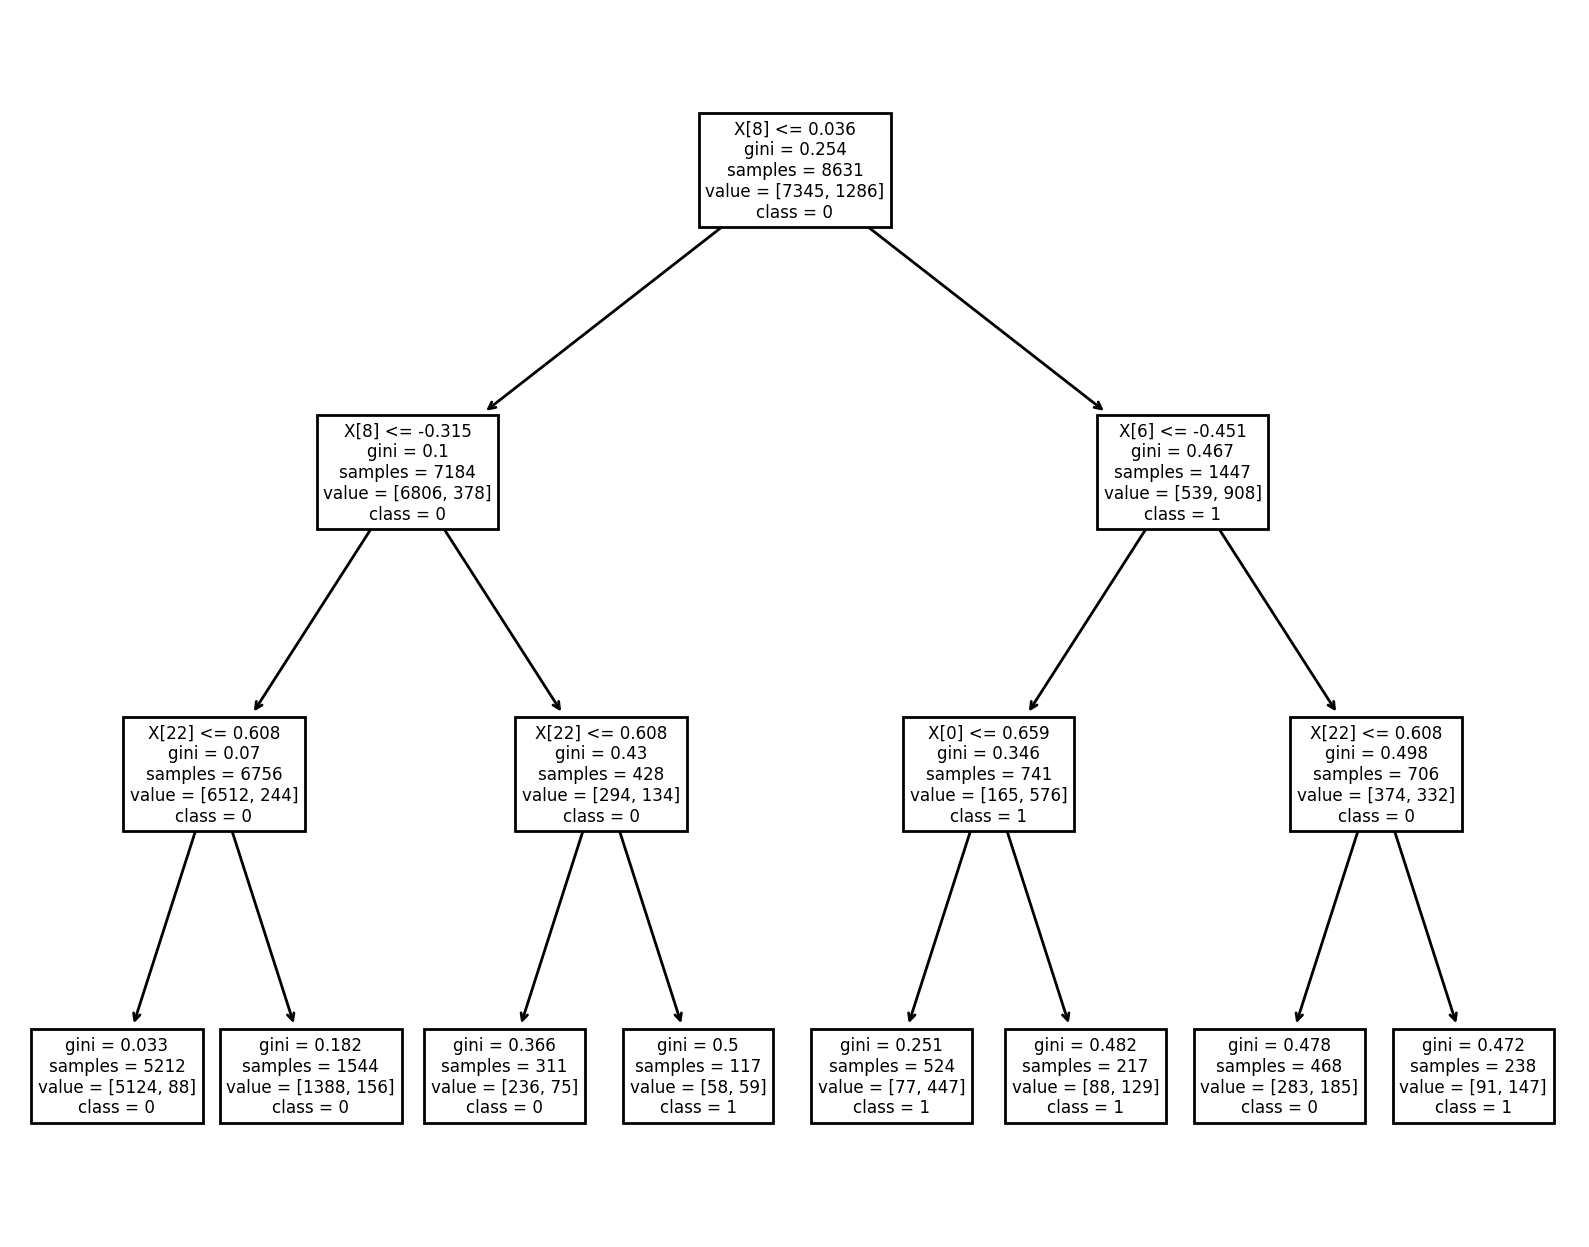

In [ ]:
#Draw decision tree
from sklearn import tree
tree.plot_tree(model_DT.fit(X_train, y_train), class_names=['0', '1'])

In [ ]:
#Predict on the test set
y_pred_DT = model_DT.predict(X_test)

#Actual value and predicted value
new_DT = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred_DT})
new_DT.head(10)

,Actual value,Predicted value
12245,0,0
9704,0,0
9177,0,0
8848,0,0
2768,0,0
11549,1,1
2193,0,0
7772,0,1
6338,1,0
4008,0,0


In [ ]:
#Confusion matrix
cnf_matrix_DT = metrics.confusion_matrix(y_test, y_pred_DT)
cnf_matrix_DT

array([[2926,  151],
       [ 265,  357]])

In [ ]:
#Evaluation metrics
print(metrics.classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3077
           1       0.70      0.57      0.63       622

    accuracy                           0.89      3699
   macro avg       0.81      0.76      0.78      3699
weighted avg       0.88      0.89      0.88      3699



In [ ]:
#Compare with train set
from sklearn.metrics import accuracy_score
y_pred_train = model_DT.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9052


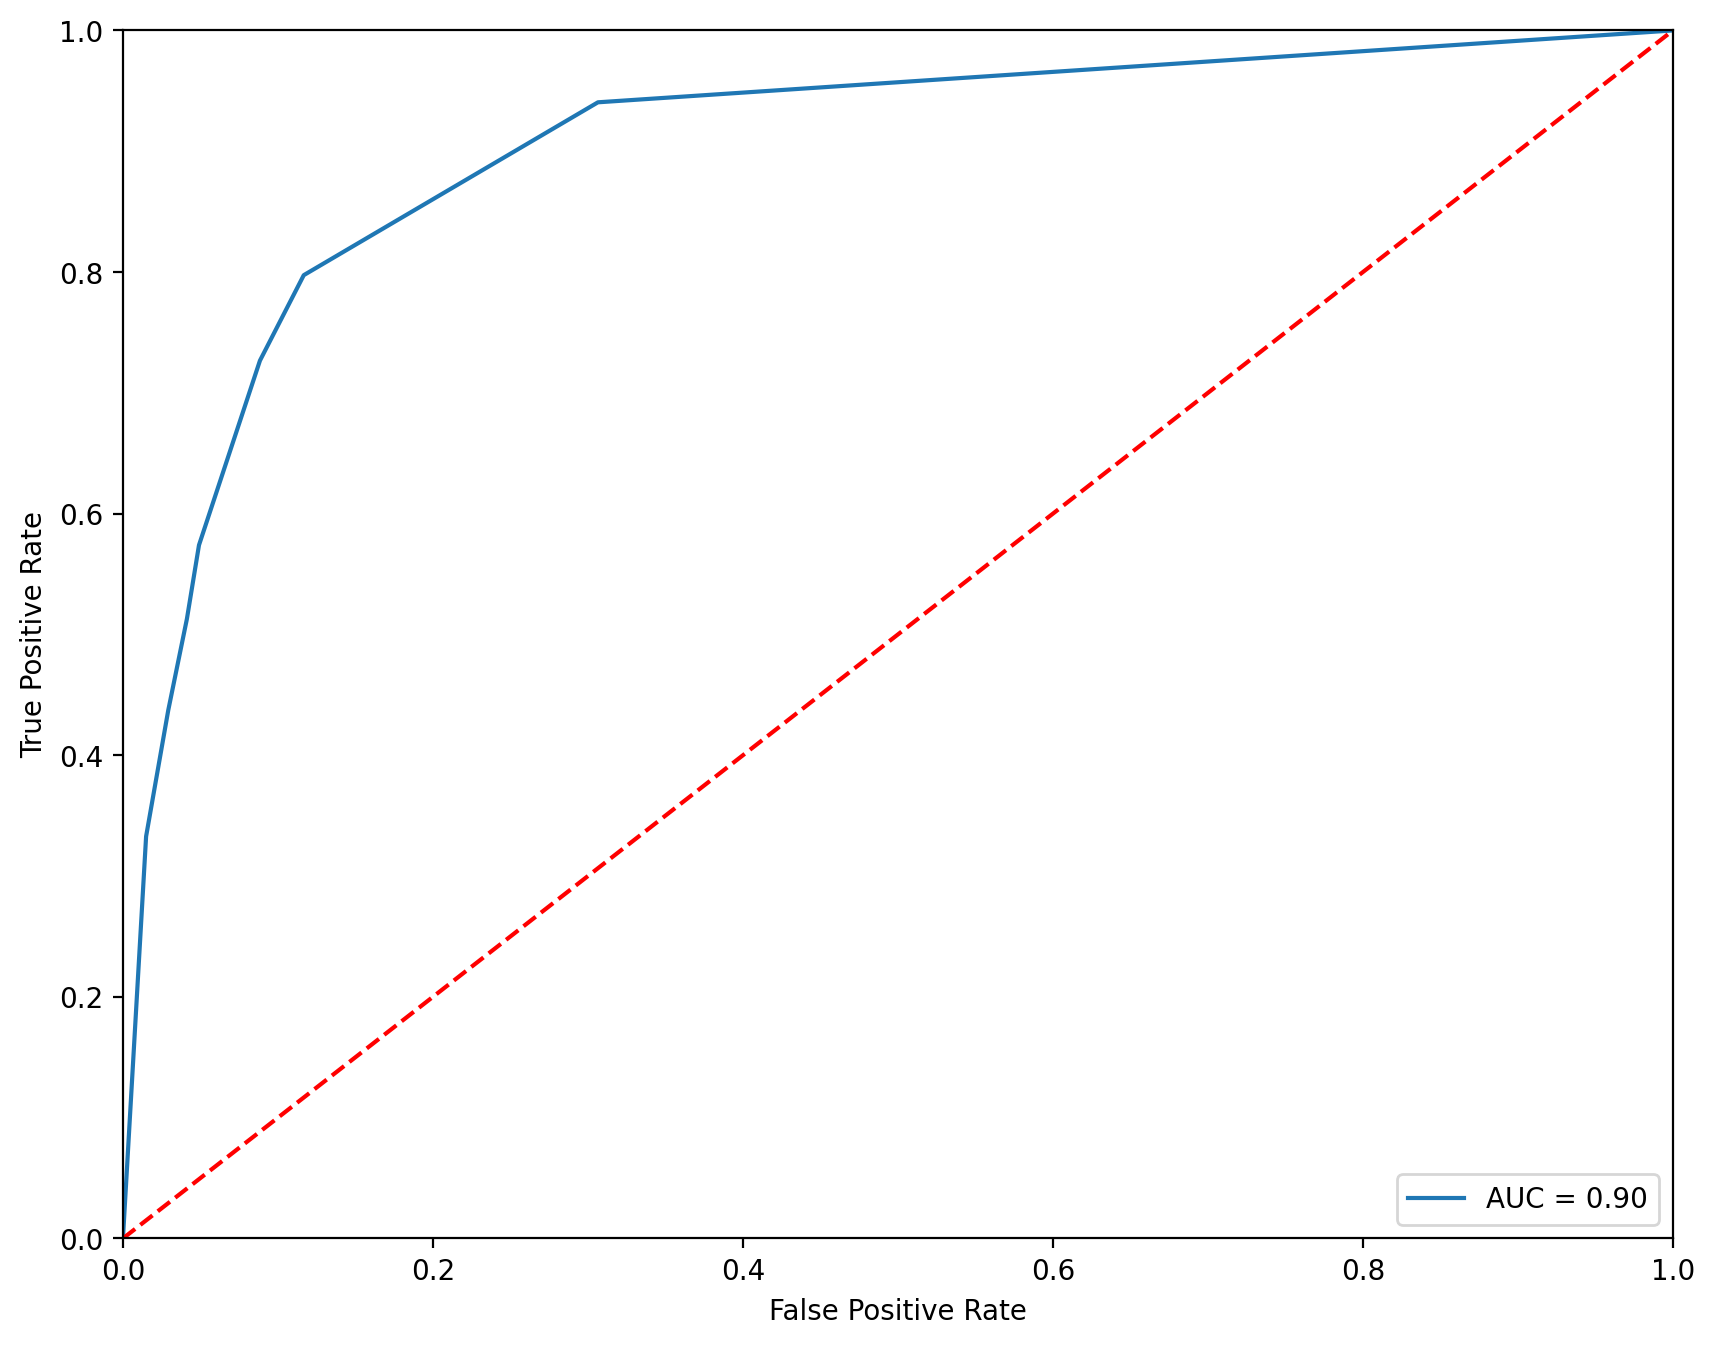

In [ ]:
#Compute ROC AUC
y_pred_proba = model_DT.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Visualize ROC curve
plt.plot(fpr,tpr,label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Random Forest

In [ ]:
#Create model
model_RF = RandomForestClassifier(random_state=0).fit(X_train,y_train)

In [ ]:
#Predict on the test set
y_pred_RF = model_RF.predict(X_test)

#Actual value and predicted value
new_RF = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred_RF})
new_RF.head(10)

,Actual value,Predicted value
12245,0,0
9704,0,0
9177,0,0
8848,0,0
2768,0,0
11549,1,1
2193,0,0
7772,0,1
6338,1,0
4008,0,0


In [ ]:
#Confusion matrix
cnf_matrix_RF = metrics.confusion_matrix(y_test, y_pred_RF)
cnf_matrix_RF

array([[2956,  121],
       [ 270,  352]])

In [ ]:
#Evaluation metrics
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      3077
           1       0.74      0.57      0.64       622

    accuracy                           0.89      3699
   macro avg       0.83      0.76      0.79      3699
weighted avg       0.89      0.89      0.89      3699



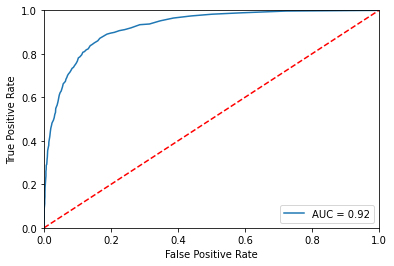

In [ ]:
#Compute ROC AUC
y_pred_proba = model_RF.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Visualize ROC curve
plt.plot(fpr,tpr,label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Neural Network

In [ ]:
#Create model
model_NN = MLPClassifier(max_iter=2000).fit(X_train, y_train)

In [ ]:
#Predict on the test set
y_pred_NN = model_NN.predict(X_test)

#Actual value and predicted value
new_NN = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred_NN})
new_NN.head(10)

,Actual value,Predicted value
12245,0,0
9704,0,0
9177,0,0
8848,0,0
2768,0,0
11549,1,0
2193,0,0
7772,0,0
6338,1,0
4008,0,0


In [ ]:
#Confusion matrix
cnf_matrix_NN = metrics.confusion_matrix(y_test, y_pred_NN)
cnf_matrix_NN

array([[2876,  201],
       [ 268,  354]])

In [ ]:
#Evaluation metrics
print(metrics.classification_report(y_test, y_pred_NN))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3077
           1       0.64      0.57      0.60       622

    accuracy                           0.87      3699
   macro avg       0.78      0.75      0.76      3699
weighted avg       0.87      0.87      0.87      3699



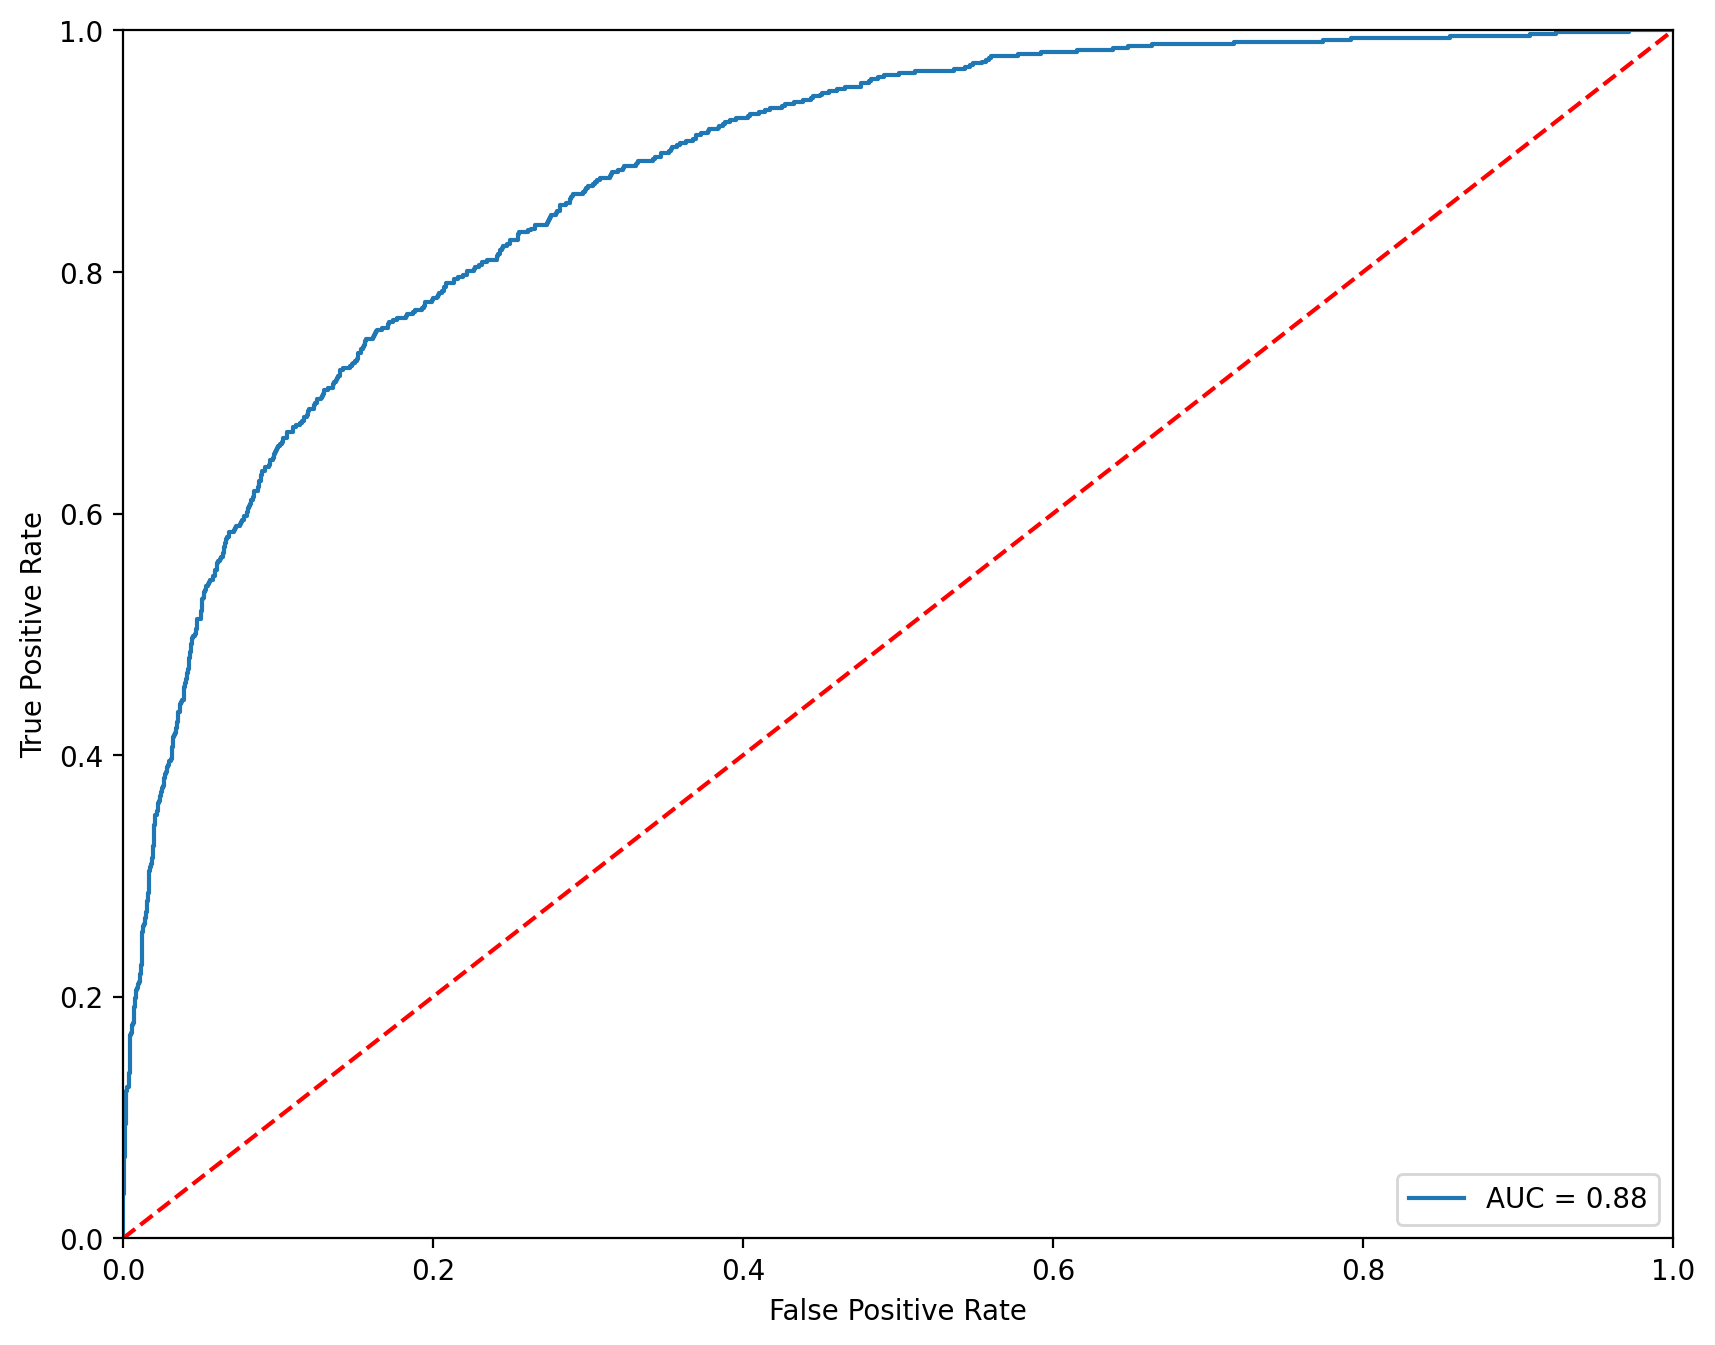

In [ ]:
#Compute ROC AUC
y_pred_proba = model_NN.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Visualize ROC curve
plt.plot(fpr,tpr,label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

##Support Vector Machine

In [ ]:
#Create model
model_SVM = SVC(probability=True).fit(X_train,y_train)

In [ ]:
#Predict on the test set
y_pred_SVM = model_SVM.predict(X_test)

#Actual value and predicted value
new_SVM = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_pred_SVM})
new_SVM.head(10)

,Actual value,Predicted value
12245,0,0
9704,0,0
9177,0,0
8848,0,0
2768,0,0
11549,1,0
2193,0,0
7772,0,0
6338,1,0
4008,0,0


In [ ]:
#Confusion matrix
cnf_matrix_SVM = metrics.confusion_matrix(y_test, y_pred_SVM)
cnf_matrix_SVM

array([[2991,   86],
       [ 346,  276]])

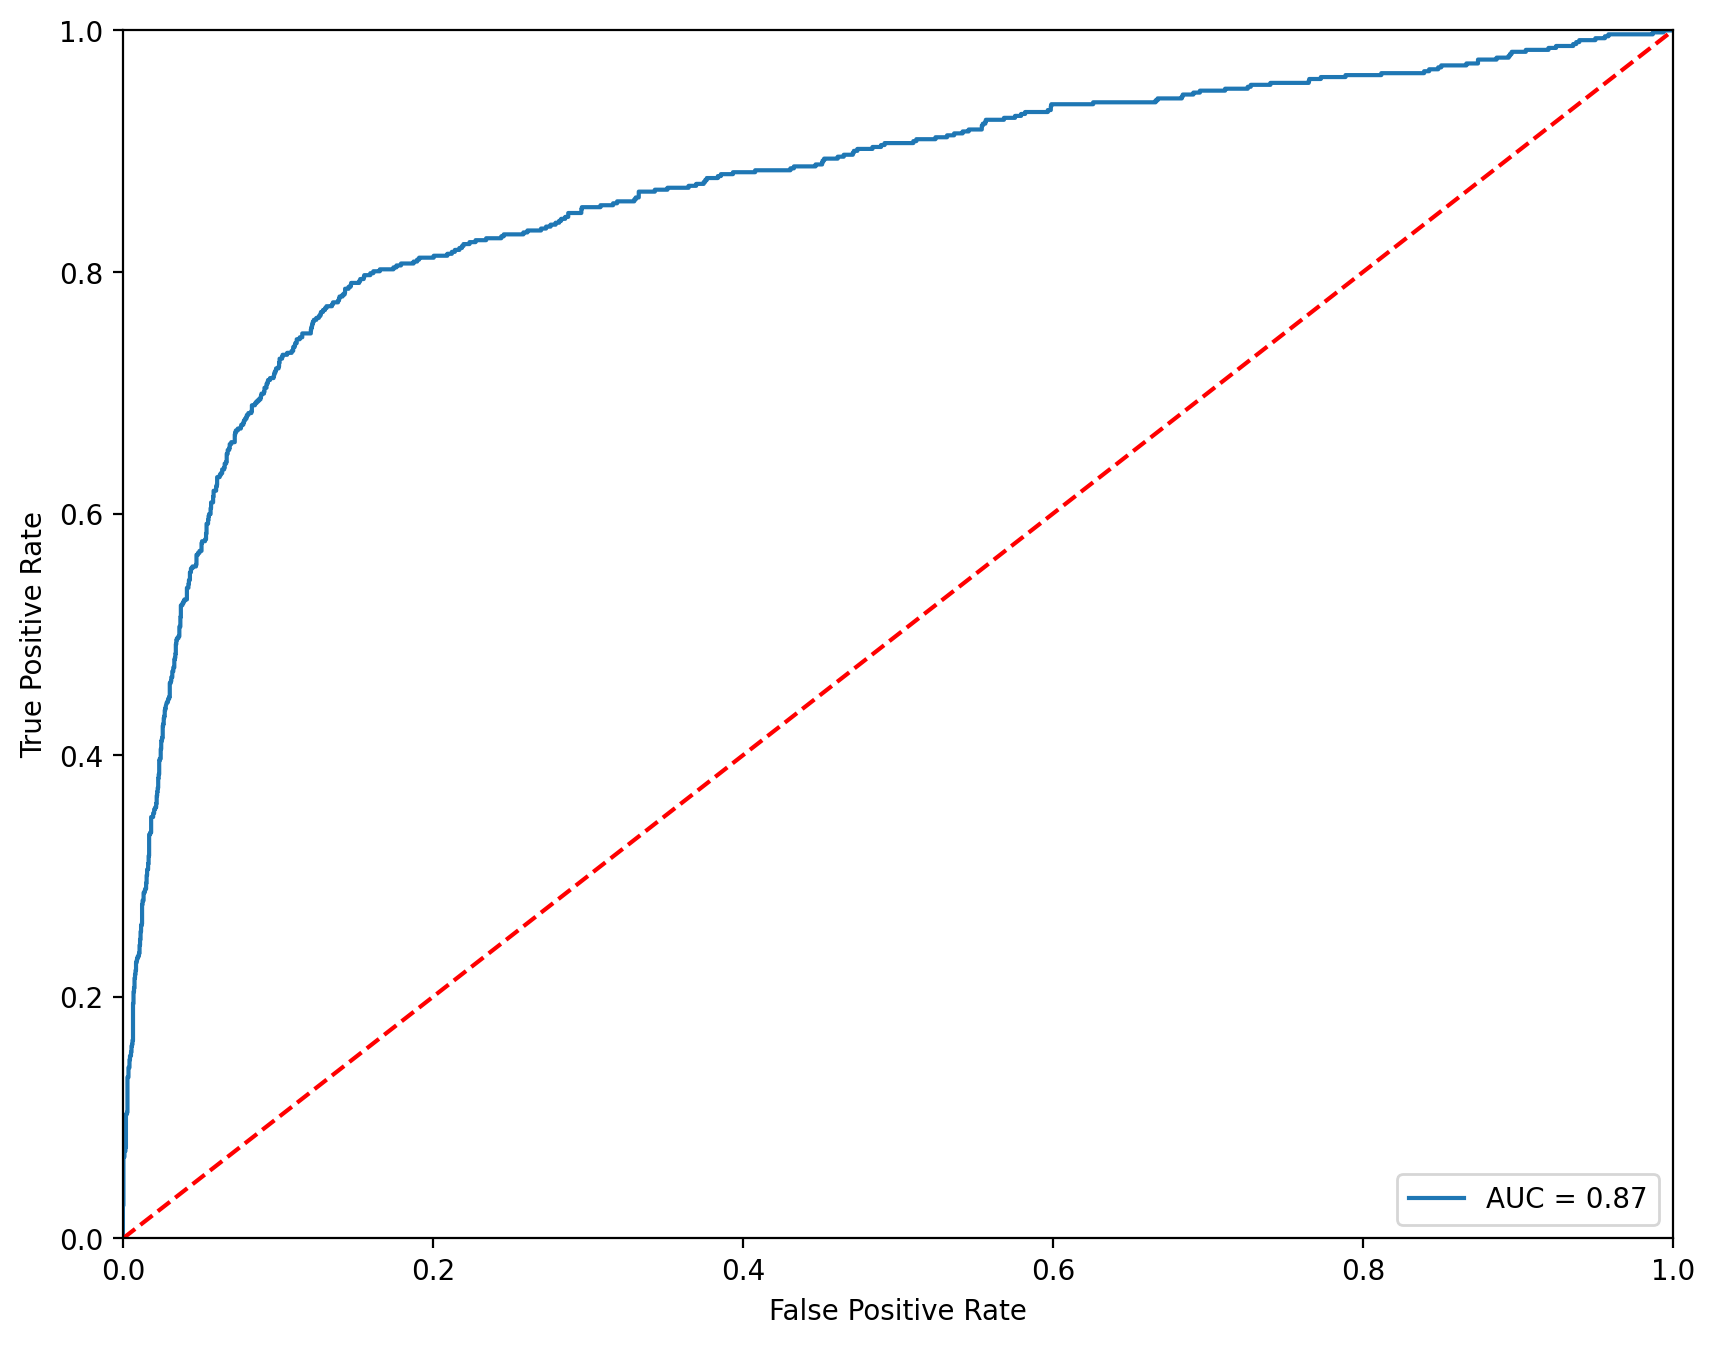

In [ ]:
#Compute ROC AUC
y_pred_proba = model_SVM.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#Visualize ROC curve
plt.plot(fpr,tpr,label="AUC = %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()